In [ ]:
%pip install pandas scikit-learn

In [ ]:
%pip install graphviz pydotplus
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, classification_report
import pydotplus
from IPython.display import Image
import graphviz

path = '/content/diabetes_risk_prediction_dataset.csv'

dados = pd.read_csv(path)

X = dados.drop('class', axis=1)
y = dados['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, random_state=42) # TESTAR PARAMETROS AQUI
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

precisao = accuracy_score(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)

print(f'A precisão do modelo é: {precisao:.2f}')
print("\nRelatório de Classificação:")
print(relatorio_classificacao)


A precisão do modelo é: 0.99

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



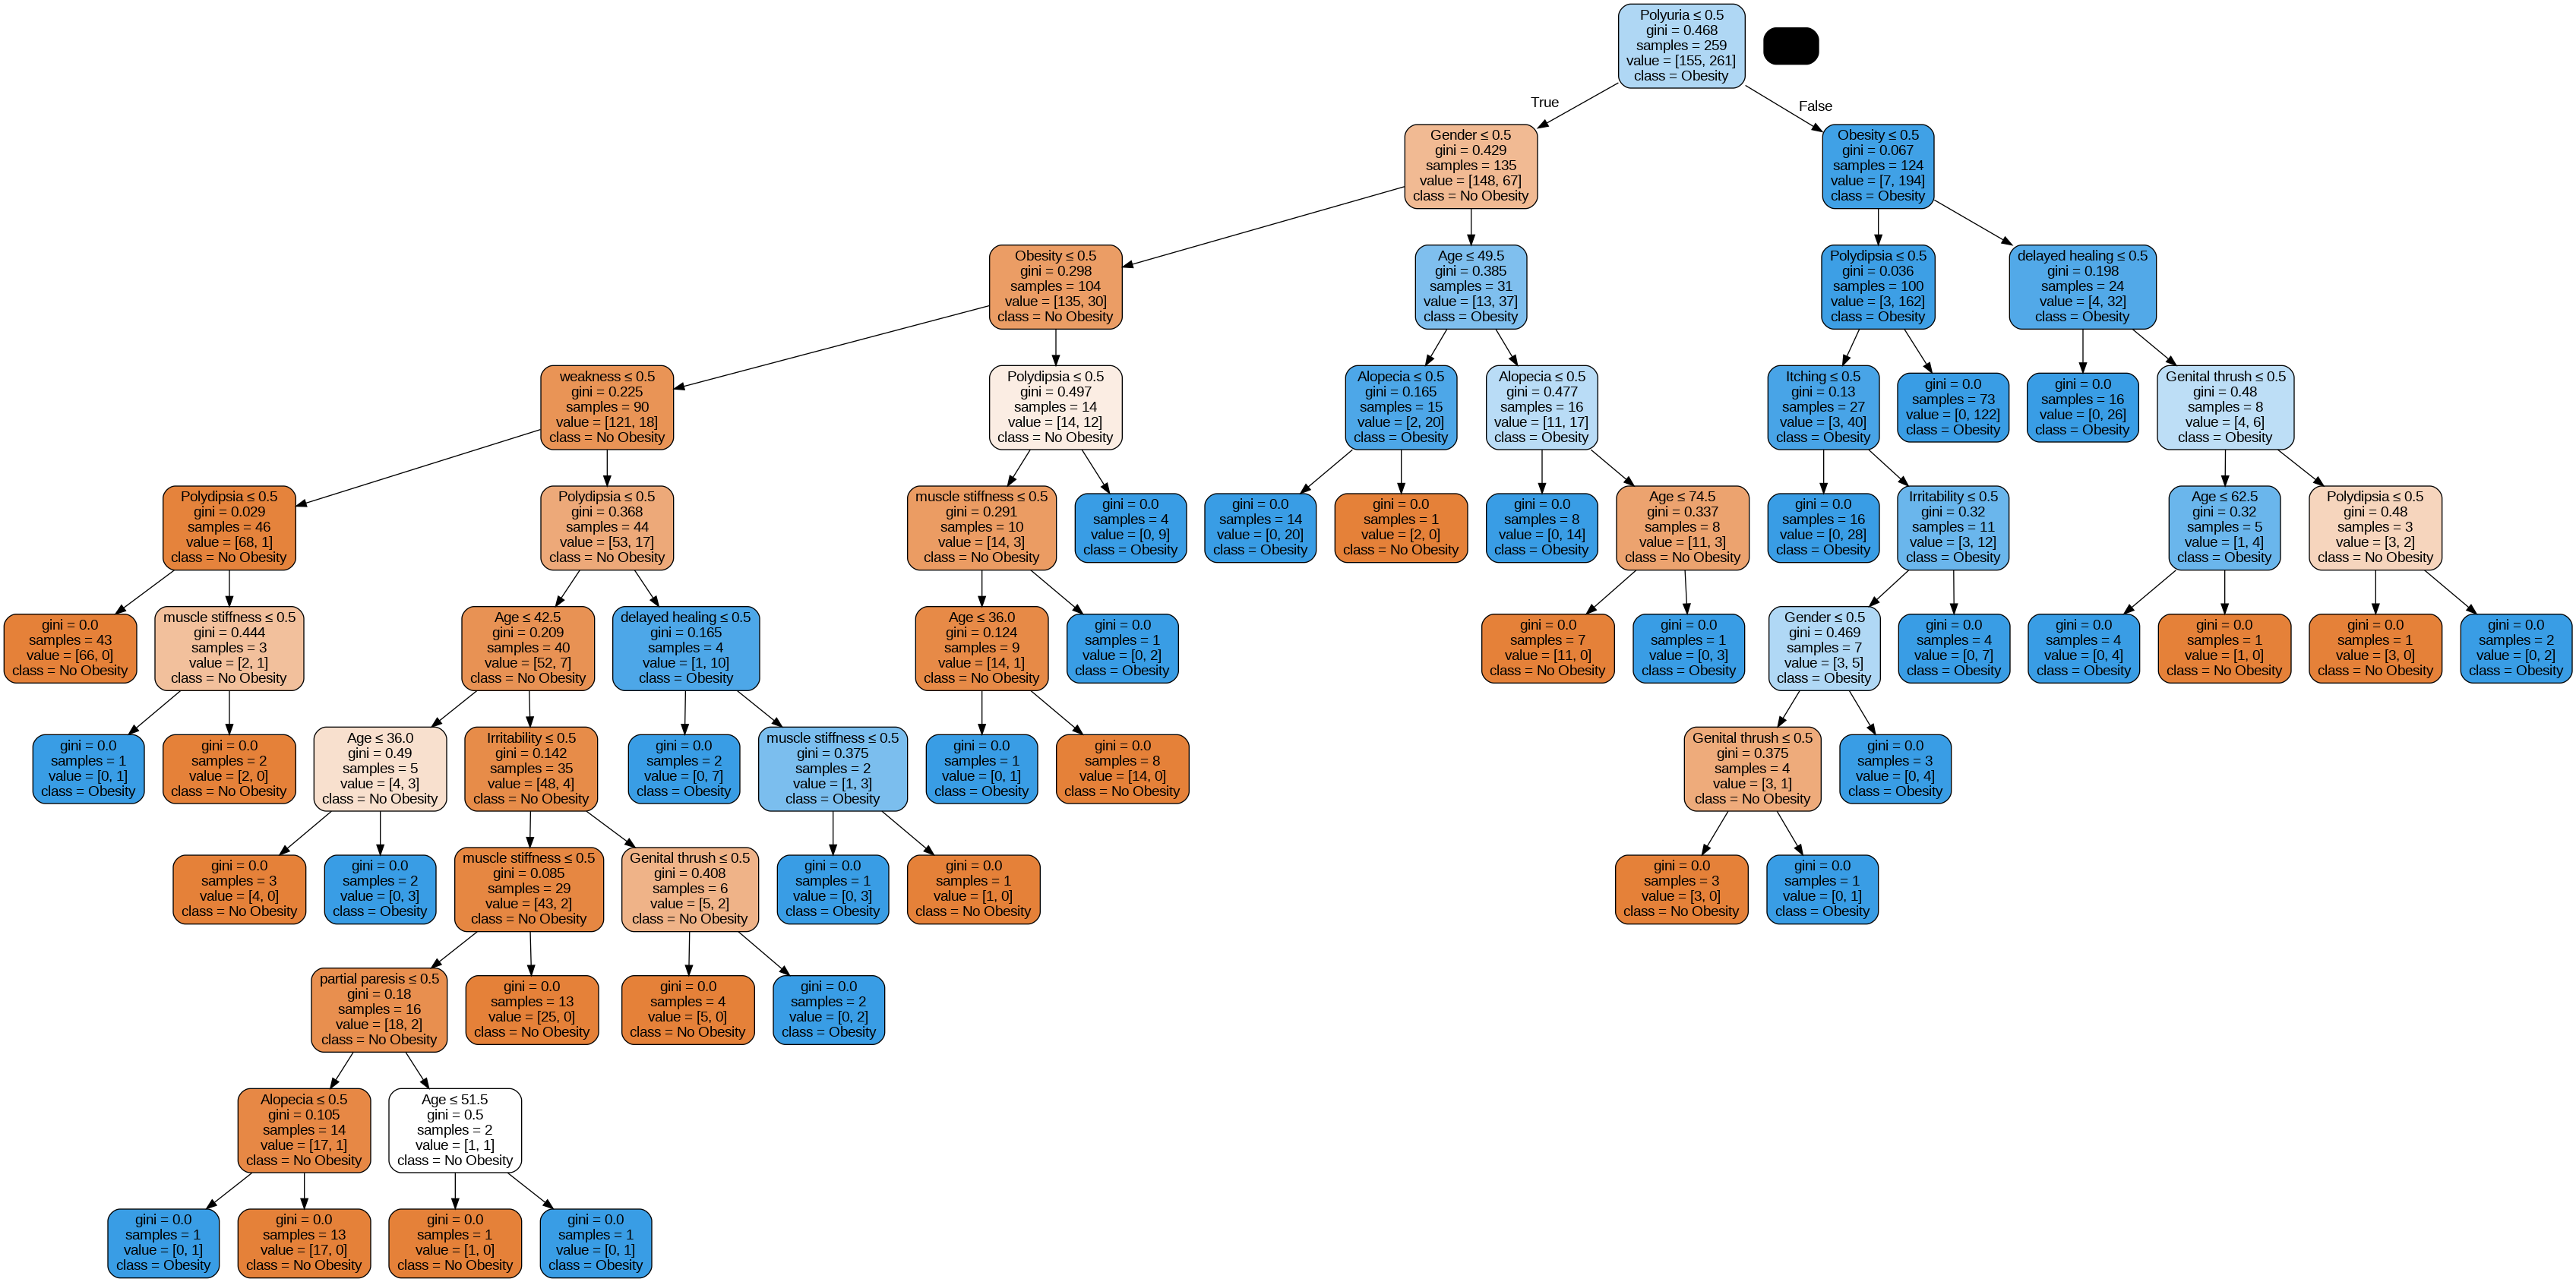

In [ ]:
dot_data = export_graphviz(
    arvore,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Obesity', 'Obesity'],
    filled=True, rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


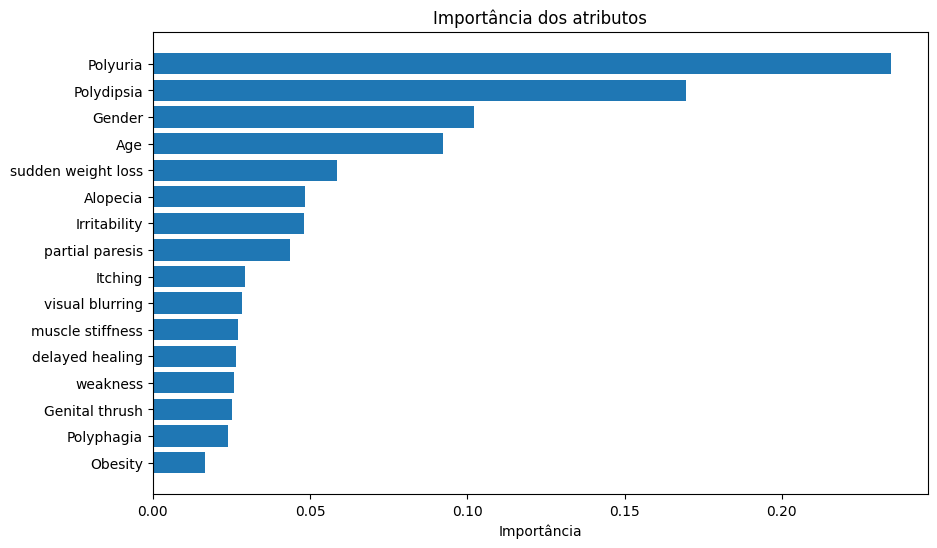

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importancias = modelo.feature_importances_

indices = np.argsort(importancias)[::-1]
nomes_features = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Importância dos atributos")
plt.barh(range(X.shape[1]), importancias[indices], align="center")
plt.yticks(range(X.shape[1]), nomes_features)
plt.xlabel("Importância")
plt.gca().invert_yaxis()
plt.show()
